<img src="https://www.learntek.org/wp-content/uploads/2017/10/Machine-Learning-Using-Python.png" class="center" img>

<div class="alert alert-block alert-success">
    <h1 align="center"> Machine Learning Course </h1>
    <h4 align="center"><a href="https://github.com/AtashfarazNavid/">Navid's Github link</a></h5>
    <h4 align="center"><a href="https://www.linkedin.com/in/navidatashfaraz/">Navid's LinkedIn </a></h5>
</div>

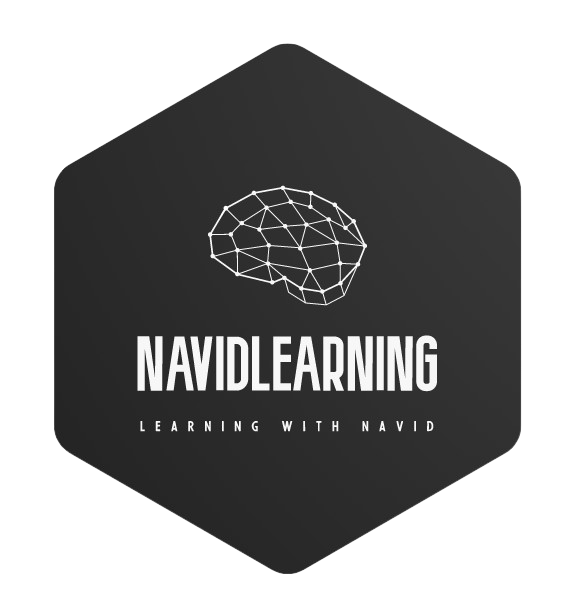

<img src="https://www.kdnuggets.com/wp-content/uploads/text-data-task-framework-preprocessing.png" width=75% />

# **Table of Contents:**

- [ ] Spliting the dataset
- [ ] Missing values
- [ ] Encoding categorical data
- - [ ] Encoding the Independent Variable
- - [ ] Encoding the Dependent Variable
- [ ] Splitting the dataset into the Training set and Test set
- [ ] Feature Scaling

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import sklearn

## **First Step** 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Pre-Processing/Data.csv')

In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### **(Solution 1 for Spliting DataSet)** 

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values 

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


### **(Solution 2 for Spliting DataSet)**  

In [ ]:
data.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [ ]:
X = data[['Country', 'Age', 'Salary']].values
y = data ['Purchased'].values
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

## **Missing Values**

<img src="https://fintechprofessor.com/wp-content/uploads/2019/12/close-up-texture-of-a-white-jigsaw-puzzle-in-assembled-state-with-missing-elements-forming-a-blue-pad_t20_WxKR61.jpg" width=50% img>

### **Sources of Missing Values**

Before we dive into code, it’s important to understand the sources of missing data. Here’s some typical reasons why data is missing:

* User forgot to fill in a field.
* Data was lost while transferring manually from a legacy database.
* There was a programming error.
* Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

In [ ]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


### **(Solution 1 for Missing Values) Dropna**

In [ ]:
data_dropna = data.copy()

In [ ]:
# summarize the shape of the raw data
print("Before:",data_dropna.shape)

# drop rows with missing values
data_dropna.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print("After:",data_dropna.shape)

Before: (10, 4)
After: (8, 4)


### **(Solution 2 for Missing Values) Use Fillna**

In [ ]:
data_fillna = data.copy()

In [ ]:
data_fillna

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# fill missing values with mean column values
data_fillna.fillna(data_fillna.mean(), inplace=True)

# count the number of NaN values in each column
print(data_fillna.isnull().sum())

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


In [ ]:
data_fillna

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


### **(Solution 3 for Missing Values) Use Scikit-learn**

The scikit-learn library provides the SimpleImputer pre-processing class that can be used to replace missing values.

It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The SimpleImputer class operates directly on the NumPy array instead of the DataFrame.

<img src="https://images.g2crowd.com/uploads/product/image/large_detail/large_detail_77c883b19775c25838d2055fc2e7387e/scikit-learn.png" width=35% />

In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### **Other Solution for Missing Data**

<img src="https://www.w3resource.com/w3r_images/pandas-series-replace-image-2.svg" img>

## **Encoding the Independent Variable and Dependent Variable**

### **(Solution 1 for Encoding Variable) One Hot Encoding**

<img src="https://etlpoint.com/wp-content/uploads/2020/07/77-696x176.png">

In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ColumnT = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ColumnT.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### **(Solution 2 for Encoding Variable) Pandas Get Dummies**

In [ ]:
#pd.get_dummies(df,columns=["Country"])

pd.get_dummies(data) 

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,1,0,0,1,0
1,27.0,48000.0,0,0,1,0,1
2,30.0,54000.0,0,1,0,1,0
3,38.0,61000.0,0,0,1,1,0
4,40.0,NaN,0,1,0,0,1
5,35.0,58000.0,1,0,0,0,1
6,NaN,52000.0,0,0,1,1,0
7,48.0,79000.0,1,0,0,0,1
8,50.0,83000.0,0,1,0,1,0
9,37.0,67000.0,1,0,0,0,1


### **(Solution 3 for Encoding Variable) Label Encoder**

<img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/08/11155757/image-37.png" img>

In [ ]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

LabelE = LabelEncoder()
y = LabelE.fit_transform(y) 

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


### **Other Solution for Encoding Map and Replace in python**

## **Splitting the DataSet into the Training Set and TestSet**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/ML_dataset_training_validation_test_sets.png/800px-ML_dataset_training_validation_test_sets.png" width=60% />

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
X_train.shape

(8, 5)

In [ ]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
print(y_test)

[0 1]


## **Feature Scaling**

**Feature Scaling or Standardization**: It is a step of **Data Pre Processing** which is applied to independent variables or features of data. It basically helps to **normalise the data within a particular range**. Sometimes, it also helps in **speeding up the calculations in an algorithm**.

<img src="https://miro.medium.com/max/2000/1*yR54MSI1jjnf2QeGtt57PA.png" width=50% img>

**1) Min Max Scaler (Normalization)**

**2) Standard Scaler**

Another reason why feature scaling is applied is that few algorithms like **gradient descent** converge much faster with feature scaling than without it.

<img src="https://miro.medium.com/max/750/1*yi0VULDJmBfb1NaEikEciA.png" width=50% />

### **MinMaxScaler**

<img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/64293/dfd58c87-9bb1-4726-e364-ce0da2d42e80.png" img>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train[:, 3:] = mm.fit_transform(X_train[:, 3:])
X_test[:, 3:] = mm.transform(X_test[:, 3:])

In [ ]:
X_train

array([[0.0, 0.0, 1.0, 0.5120772946859904, 0.11428571428571432],
       [0.0, 1.0, 0.0, 0.5652173913043479, 0.45079365079365075],
       [1.0, 0.0, 0.0, 0.7391304347826089, 0.6857142857142855],
       [0.0, 0.0, 1.0, 0.4782608695652175, 0.37142857142857144],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.9130434782608696, 0.8857142857142857],
       [0.0, 1.0, 0.0, 1.0, 1.0],
       [1.0, 0.0, 0.0, 0.34782608695652173, 0.2857142857142856]],
      dtype=object)

### **StandardScaler**

<img src="https://cdn-images-1.medium.com/max/800/0*vQEjz0mvylP--30Q.GIF" img>


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

<img src="https://files.virgool.io/upload/users/237693/posts/jr7y3twdpoxl/ciirhh4b9rwv.png" img>

In [ ]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578537 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057581 -0.07013167641635436]
 [1.0 0.0 0.0 0.5667085065333245 0.6335624327104541]
 [0.0 0.0 1.0 -0.3045301939022482 -0.3078661727429788]
 [0.0 0.0 1.0 -1.9018011447007983 -1.4204636155515822]
 [1.0 0.0 0.0 1.1475343068237058 1.2326533634535486]
 [0.0 1.0 0.0 1.4379472069688963 1.5749910381638883]
 [1.0 0.0 0.0 -0.740149544120035 -0.5646194287757338]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830116 -0.9069571034860727]
 [1.0 0.0 0.0 -0.4497366439748436 0.20564033932252992]]
